# Analysis of P Network Model

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import math
import seaborn as sns
import powerlaw
import community
from IPython.display import Image, display

cleaned_data_path = "cleaned_data"
networks_path = "networks"

In [4]:
# reading the network
BGNetC = nx.read_gml(f"{networks_path}/BGNetC.gml")

In [5]:
# Iterate through the edges and update the 'weight' attribute to be of type int
for u, v, attr in BGNetC.edges(data=True):
    attr['weight'] = int(attr['weight'])


# Basic Network Features

In [6]:
density = nx.density(BGNetC)
print(f'Network Density: {round(density, 4)}')

Network Density: 0.1263


Comment: The network is vary sparse.

In [7]:
# links per node
links_per_node = len(BGNetC.edges())/len(BGNetC.nodes())
print(f'Links per node: {round(links_per_node, 4)}')

Links per node: 11.1742


6) What is the average distance for the network? What is the diameter of the network?

In [8]:
avg_dist = nx.average_shortest_path_length(BGNetC)
print(f'Average distance: {round(avg_dist, 2)}')

Average distance: 2.3


In [9]:
diameter = nx.diameter(BGNetC)
print(f'Network Diameter: {diameter}')

Network Diameter: 6


7) How connected and centralized this network is? What is the number of connected components and what are their sizes? Is there a giant component?

In [10]:
print(f'Is connected: {nx.is_connected(BGNetC)}')
print(f'Number of connected components: {nx.number_connected_components(BGNetC)}')

Is connected: True
Number of connected components: 1


8) What are the average and the global clustering coefficients? Show the distribution of local clustering coefficient of network's nodes. Is clustering strong or not? Answer by comparing with randomly generated Erdos-Renyi and scale free networks of the same dimension.

In [11]:
average_clustering = nx.average_clustering(BGNetC, weight='weight')
print(f'Average clustering coefficient: {round(average_clustering, 4)}')

Average clustering coefficient: 0.0794


In [12]:
global_clustering = nx.transitivity(BGNetC)
# closed_triplets = sum(nx.triangles(BGNetC).values()) // 3
# all_possible_triplets = math.comb(len(BGNetC.nodes), 3)
# global_clustering = closed_triplets/all_possible_triplets
print(f'Global clustering coefficient: {round(global_clustering, 3)}')

Global clustering coefficient: 0.487


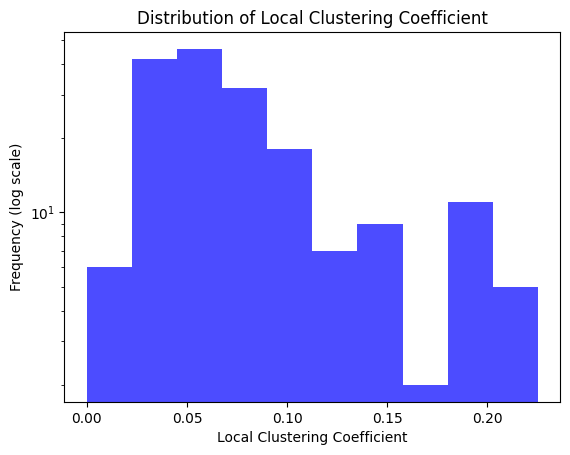

In [13]:
# Plotting the distribtion of clustering coefficients
clustering = nx.clustering(BGNetC, weight="weight")
values = list(clustering.values())

# create a histogram
plt.hist(values, bins=10, alpha=0.7, color='blue')
# log scale for y axis
plt.yscale('log')

plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Local Clustering Coefficient')

# Show the plot
plt.show()

comment: The distribution of local node clustering coefficient appears to be more normal compared to network L.

In [14]:
# calculate the edge creation probabiliy needed for Erdos-Renyi model
number_of_nodes = BGNetC.number_of_nodes()
num_of_edges = BGNetC.number_of_edges()
n = BGNetC.number_of_nodes()
m = BGNetC.number_of_edges()
p = ( 2*float(m) ) / ( n* (n-1) )
potential_num_of_edges = num_of_edges*(num_of_edges-1)/2
edge_creation_probability = num_of_edges/potential_num_of_edges

In [15]:
# Erdos-Renyi and scale free models
NetER = nx.erdos_renyi_graph(number_of_nodes, p)
NetSFMulti = nx.scale_free_graph(number_of_nodes)
NetSF = nx.DiGraph()
for i, j in NetSFMulti.edges():
    if not NetSF.has_edge(i, j):
        NetSF.add_edge(i, j, weight=1)
    else:
        NetSF[i][j]['weight'] += 1

In [16]:
average_clustering_ER = nx.average_clustering(NetER)
average_clustering_SF = nx.average_clustering(NetSF)
print(f'Erdos Renyi Average Clustering Coefficient: {round(average_clustering_ER, 5)}')
print(f'Scale Free Average Clustering Coefficient: {round(average_clustering_SF, 3)}')

Erdos Renyi Average Clustering Coefficient: 0.12479
Scale Free Average Clustering Coefficient: 0.131


comment: Clustering is weak since the network has similar average clustering coefficient as Erdos Renyi model.

9) Based on the answers from 6. and 8. determine whether this network represents a small-world network.

comment: Since global clustering coefficient is high and average distance between nodes is small compared to the size of network, this network **does** represent a small-world network.

10. Conduct assortativity analysis by node degree and answer whether assortative mixing is expressed. Give visualisation as well.

Assortativity measures the similarity of connections in the graph with respect to the node degree. <br>
Here, I have used the overall node degree (both in and out connections are calculated).

In [17]:
degree_assortativity = nx.degree_pearson_correlation_coefficient(BGNetC)
print(f"Degree Assortativity Coefficient: {degree_assortativity:.2f}")
degree_assortativity = nx.degree_pearson_correlation_coefficient(BGNetC, weight='weight')
print(f"Weighted Degree Assortativity Coefficient: {degree_assortativity:.2f}")

Degree Assortativity Coefficient: 0.13
Weighted Degree Assortativity Coefficient: 0.04


comment: Because of low weighted and non-weighted assortativity coefficient, it is safe to say that the network is not assortative.

In [18]:
# Plot network; each node's size is propotional to the sqare of its degree; this is because we want to check assortativity
# Plot network; each node's size is propotional to the sqare of its degree; this is because we want to check assortativity
degrees = dict(BGNetC.degree())

plt.figure(figsize=(20, 15)) 
pos = nx.spring_layout(BGNetC)
nx.draw(BGNetC, pos=pos, with_labels=True, labels={node: node[node]['label'] for node in BGNetC.nodes()}, font_size=8,
        width=0.01, edgecolors='black', linewidths=0.1, node_size=node_sizes, node_color='skyblue', edge_color='grey', arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


# node_sizes = [ degrees[node] for node in BGNetC.nodes()]

# node_positions = {node: (BGNetC.nodes[node]['stop_lon'], BGNetC.nodes[node]['stop_lat']) for node in BGNetC.nodes()}

# plt.figure(figsize=(20, 15)) 
# pos = nx.spring_layout(BGNetC)
# nx.draw(BGNetC, pos=pos, with_labels=False, width=0.01, edgecolors='black', linewidths=0.1, node_size=node_sizes, node_color='skyblue', edge_color='grey', arrows=False)

# plt.margins(0, 0)
# plt.gca().xaxis.set_visible(False)
# plt.gca().yaxis.set_visible(False)

# plt.show()

TypeError: string indices must be integers

<Figure size 2000x1500 with 0 Axes>

In [ ]:
# Plot network; WEIGHTED DEGREE ;each node's size is propotional to the its degree; this is because we want to check assortativity
degrees = dict(BGNetC.degree(weight='weight'))

node_sizes = [ degrees[node] for node in BGNetC.nodes()]

node_positions = {node: (BGNetC.nodes[node]['stop_lon'], BGNetC.nodes[node]['stop_lat']) for node in BGNetC.nodes()}

plt.figure(figsize=(20, 15)) 
# pos = nx.kamada_kawai_layout(BGNetC)
nx.draw(BGNetC, pos=pos, with_labels=False, width=0.01, edgecolors='black', linewidths=0.1, node_size=node_sizes, node_color='skyblue', edge_color='grey', arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


KeyError: 'stop_lon'

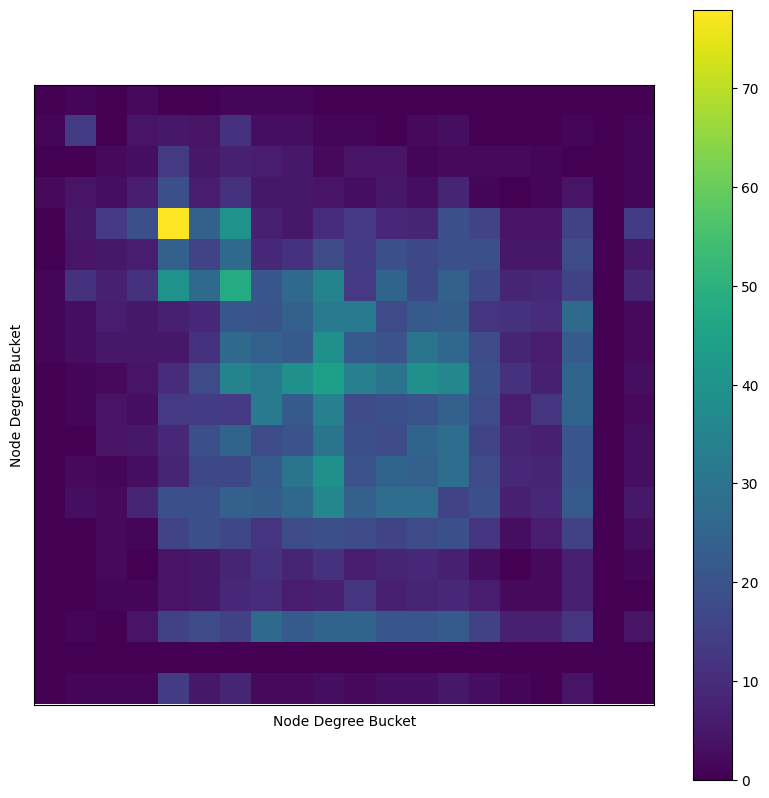

In [19]:
# Plotting a heatmap that will show node assortativity
degrees = dict(BGNetC.degree())
for key in degrees:
    degrees[key] = degrees[key] // 3
max_degree = max(degrees.values())
min_degree = min(degrees.values())

degree_matrix = np.zeros((max_degree - min_degree + 1, max_degree - min_degree + 1), dtype=int)

for node, degree in degrees.items():
    neighbors_of_node = list(BGNetC.neighbors(node))
    for neighbor in neighbors_of_node:
        degree1 = BGNetC.degree(neighbor) // 3
        degree_matrix[degree-min_degree][degree1-min_degree]+=1

plt.figure(figsize=(10, 10))
plt.imshow(degree_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("Node Degree Bucket")
plt.ylabel("Node Degree Bucket")
plt.show()

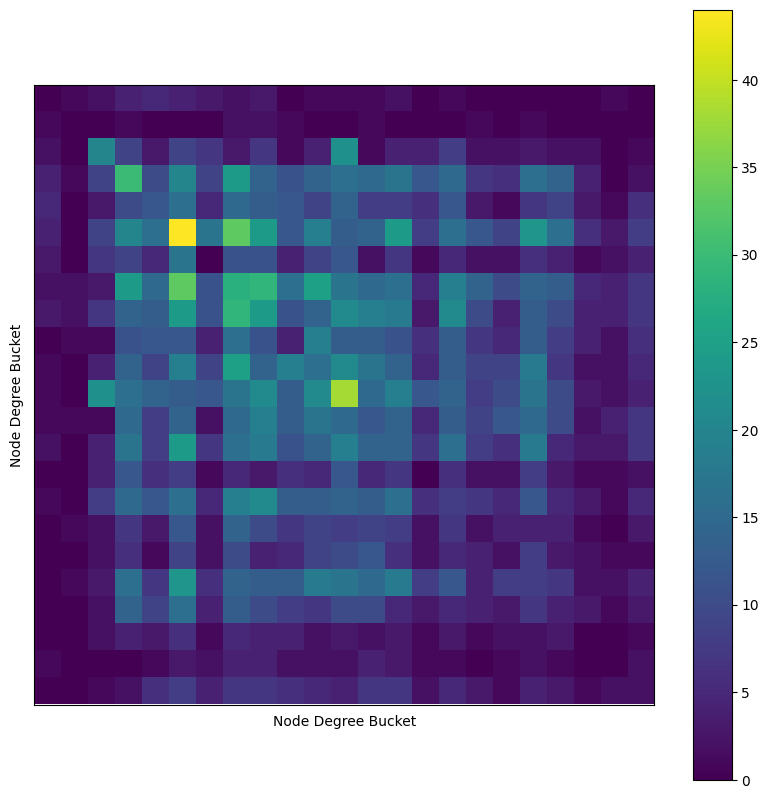

In [20]:
# Plotting a heatmap that will show node assortativity
degrees = dict(BGNetC.degree(weight='weight'))
for key in degrees:
    degrees[key] = degrees[key] // 20
max_degree = max(degrees.values())
min_degree = min(degrees.values())

degree_matrix = np.zeros((max_degree - min_degree + 1, max_degree - min_degree + 1), dtype=int)

for node, degree in degrees.items():
    neighbors_of_node = list(BGNetC.neighbors(node))
    for neighbor in neighbors_of_node:
        degree1 = BGNetC.degree(neighbor, weight='weight') // 20
        degree_matrix[degree-min_degree][degree1-min_degree]+=1

plt.figure(figsize=(10, 10))
plt.imshow(degree_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("Node Degree Bucket")
plt.ylabel("Node Degree Bucket")
plt.show()

11. Does the network show <i>rich club phenomenon</i>? <br>
The "rich-club phenomenon" in a network refers to the tendency of nodes with a high degree (number of connections) to be more densely connected to each other than what would be expected by random chance. <br>In other words, it suggests that nodes with a higher degree are more likely to form interconnected subgraphs or "clubs."

In [21]:
# In order to use rich_club_coefficient function from NetworkX, we first have to transform the network to undirected
BGNetC_undirected = BGNetC.to_undirected()

In [22]:
nx.rich_club_coefficient(BGNetC_undirected, normalized=True)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0005050505050508,
 4: 1.0041152263374487,
 5: 1.0041472265422497,
 6: 1.0041601664066562,
 7: 1.004190675746464,
 8: 1.0042780748663103,
 9: 1.0043196544276456,
 10: 1.009381898454746,
 11: 1.0106741573033706,
 12: 1.0108015918135305,
 13: 1.0336294416243654,
 14: 1.0452127659574468,
 15: 1.0486787204450625,
 16: 1.0600144613159799,
 17: 1.0649149922720247,
 18: 1.0836751435602954,
 19: 1.1029281277728484,
 20: 1.1237623762376237,
 21: 1.1264864864864865,
 22: 1.1148272017837235,
 23: 1.1108404384896469,
 24: 1.108991825613079,
 25: 1.1074626865671644,
 26: 1.1114599686028257,
 27: 1.1242937853107344,
 28: 1.094949494949495,
 29: 1.0979498861047834,
 30: 1.0987341772151897,
 31: 1.1274238227146816,
 32: 1.122977346278317,
 33: 1.1216216216216217,
 34: 1.1171875,
 35: 1.090047393364929,
 36: 1.1098265895953756,
 37: 1.1532846715328466,
 38: 1.0826446280991735,
 39: 1.0459770114942528,
 40: 1.0704225352112675,
 41: 1.1090909090909091,
 42: 1.1842105263157

comment: For some reason, this function returns division by zero. I will write my own.

In [23]:
degrees = dict(BGNetC.degree(weight='weight'))
max_degree = max(degrees.values())
max_degree

448

comment: Based on the max weighted node degree, which is 448, I chose 380 as a threshold for a 'high degree'

In [24]:
results = {}
# Iterate through nodes and get those with high degrees
node_degree = 380
nodes_with_high_degree = [node for node in BGNetC.nodes() if BGNetC.degree(node, weight='weight') > node_degree]
num_nodes = len(nodes_with_high_degree)
# Calculate the number of edges between nodes with high degree
edge_count = 0
for node1 in nodes_with_high_degree:
    for node2 in nodes_with_high_degree:
        if node1 < node2 and BGNetC.has_edge(node1, node2):
            edge_count += 1

# Calculate rich club coefficient
rich_club_coeff = 2*edge_count/(num_nodes*(num_nodes-1))

print(f"Rich Club Coefficient for nodes with weighted degree > {node_degree}: {rich_club_coeff:.3f}")


Rich Club Coefficient for nodes with weighted degree > 380: 0.619


comment: Rich club coefficient is pretty high (above 0.5), so it appears that the network **does** show the rich club fenomenon at some extent.

13. Node degree distribution? Does it follow <i>power law</i> distribution?

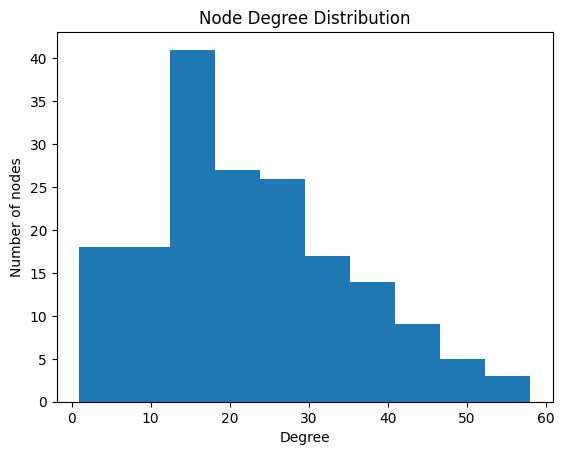

In [25]:
# Plot the histogram
degrees = dict(BGNetC.degree())

plt.hist(list(degrees.values()))

plt.xlabel('Degree')
# plt.yscale('log')
plt.ylabel('Number of nodes')
plt.title('Node Degree Distribution')

plt.show()

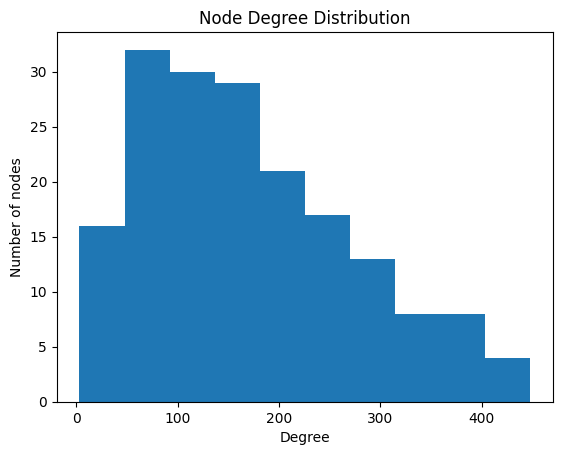

In [26]:
# Plot the histogram; weighted degrees
degrees = dict(BGNetC.degree(weight='weight'))

plt.hist(list(degrees.values()))

plt.xlabel('Degree')
# plt.yscale('log')
plt.ylabel('Number of nodes')
plt.title('Node Degree Distribution')

plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


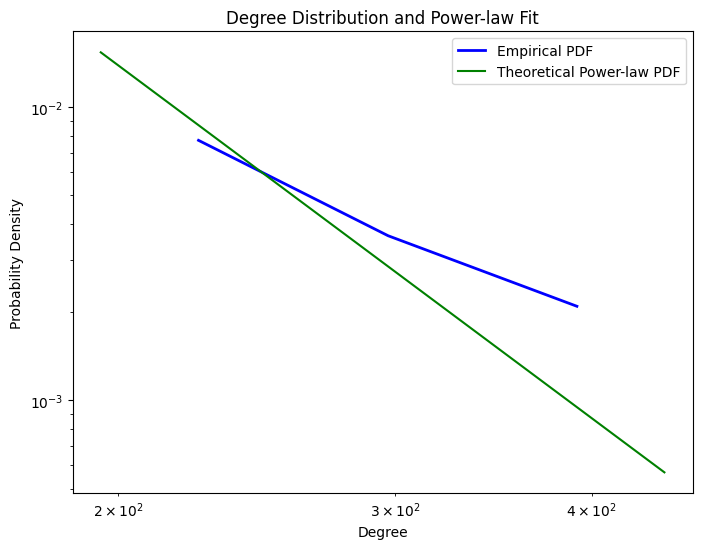

In [28]:

# Calculate node degrees
degree_sequence = sorted([d for n, d in BGNetC.degree(weight='weight')], reverse=True)
degree_sequence = [d-min(degree_sequence) for d in degree_sequence]

# Fit a power-law distribution using the powerlaw package
fit = powerlaw.Fit(degree_sequence)

# Create a new figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the empirical PDF
fit.plot_pdf(color='b', linewidth=2, ax=ax, label='Empirical PDF')

# Plot the theoretical power-law PDF
fit.power_law.plot_pdf(color='g', ax=ax, label='Theoretical Power-law PDF')

# Add title and legend
plt.title('Degree Distribution and Power-law Fit')
plt.legend()

# Add labels to the axes
plt.xlabel('Degree')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

comment: The distribution is not exactly following power-law distribution.

# Centrality Analysis

14. Conduct centrality analyses by degree, closeness and betweenness centrality. Give an overview 
the most important nodes for each of them.

In [29]:
routes_df = pd.read_csv('cleaned_data/routes.csv')
routes_df.head()

,route_id,route_short_name,route_long_name,route_type
0,2,2,Unutrašnji Krug - Spoljašnji Krug,0
1,5,5,Kalemegdan /Donji Grad/ - Ustanička,0
2,6,6,Tašmajdan - Ustanička,0
3,7,7,Ustanička - Blok 45,0
4,9,9,Banjica - Blok 45,0


#### Degree Centrality

In [30]:
degree_centrality = nx.degree_centrality(BGNetC)
degree_centrality = {int(key): value for key, value in degree_centrality.items()}
routes_df['degree_centrality'] = routes_df['route_id'].map(degree_centrality)

In [31]:
routes_df.sort_values(by='degree_centrality', ascending=False).head(5)

,route_id,route_short_name,route_long_name,route_type,degree_centrality
42,50,50,Ustanička - Banovo Brdo,3,0.327684
66,78,78,Banjica 2 - Zemun /Novi Grad/,3,0.299435
72,85,85,Banovo Brdo - Borča 3,3,0.299435
16,23,23,Karaburma 2 - Vidikovac,3,0.293785
30,37,37,Železnička Stanica Pančevački Most - Kneževac,3,0.293785


#### Closeness Centrality

In [33]:
closeness_centrality = nx.closeness_centrality(BGNetC)
closeness_centrality = {int(key): value for key, value in closeness_centrality.items()}
routes_df['closeness_centrality'] = routes_df['route_id'].map(closeness_centrality)

In [35]:
routes_df.sort_values(by='closeness_centrality', ascending=False).head(5)

,route_id,route_short_name,route_long_name,route_type,degree_centrality,closeness_centrality
72,85,85,Banovo Brdo - Borča 3,3,0.299435,0.569132
42,50,50,Ustanička - Banovo Brdo,3,0.327684,0.563694
16,23,23,Karaburma 2 - Vidikovac,3,0.293785,0.549689
30,37,37,Železnička Stanica Pančevački Most - Kneževac,3,0.293785,0.547988
66,78,78,Banjica 2 - Zemun /Novi Grad/,3,0.299435,0.547988


#### Betweenness Centrality

In [36]:
betweenness_centrality = nx.betweenness_centrality(BGNetC)
betweenness_centrality = {int(key): value for key, value in betweenness_centrality.items()}
routes_df['betweenness_centrality'] = routes_df['route_id'].map(betweenness_centrality)

In [37]:
routes_df.sort_values(by='betweenness_centrality', ascending=False).head(5)

,route_id,route_short_name,route_long_name,route_type,degree_centrality,closeness_centrality,betweenness_centrality
42,50,50,Ustanička - Banovo Brdo,3,0.327684,0.563694,0.087488
72,85,85,Banovo Brdo - Borča 3,3,0.299435,0.569132,0.064644
210,90001,E1,Ustanička - Blok 45,702,0.242938,0.539634,0.054584
66,78,78,Banjica 2 - Zemun /Novi Grad/,3,0.299435,0.547988,0.050036
81,101,101,Omladinski Stadion - Padinska Skela,3,0.079096,0.403189,0.046355


15. Which nodes are the most important regarding the eigenvalue cantrality? What does it mean?

In [40]:
eigenvector_centrality = nx.eigenvector_centrality(BGNetC)
eigenvector_centrality = {int(key): value for key, value in eigenvector_centrality.items()}
routes_df['eigenvector_centrality'] = routes_df['route_id'].map(eigenvector_centrality)

In [41]:
routes_df.sort_values(by='eigenvector_centrality', ascending=False).head(5)

,route_id,route_short_name,route_long_name,route_type,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
72,85,85,Banovo Brdo - Borča 3,3,0.299435,0.569132,0.064644,0.170180
74,88,88,Zemun /Kej Oslobođenja/ - Novi Železnik,3,0.288136,0.537994,0.034737,0.159153
16,23,23,Karaburma 2 - Vidikovac,3,0.293785,0.549689,0.034265,0.157544
30,37,37,Železnička Stanica Pančevački Most - Kneževac,3,0.293785,0.547988,0.026104,0.153466
50,58,58,Železnička Stanica Pančevački Most - Novi Žele...,3,0.271186,0.523669,0.018557,0.152314


comment: This tells us that these nodes are well connected to some other well-connected nodes.

16. On the basis of the previous two questions, propose and construct a heuristic (composite measure of
centralities) to find the most important nodes and find them. <br> Pay attention to the type of network
which is analyzed (directed or undirected) and, accordingly, adjusted how different 
network metrics affect heuristics.

comment: I propose a metric that will just represent a weighted average of normalized 

In [ ]:
pagerank_centrality = nx.pagerank(BGNetC, weight='weight')

# Normalize centrality values to the range [0, 1]
def normalize_centrality(centrality_values):
    max_value = max(centrality_values.values())
    min_value = min(centrality_values.values())
    normalized = {node: (value - min_value) / (max_value - min_value) for node, value in centrality_values.items()}
    return normalized

normalized_betweenness = normalize_centrality(weighted_betweenness_centrality)
normalized_closeness = normalize_centrality(weighted_closeness_centrality)
normalized_pagerank = normalize_centrality(pagerank_centrality)
normalized_eigenvector = normalize_centrality(eigenvector_centrality)


In [ ]:
weight_betweenness = 0.3
weight_closeness = 0.2
weight_pagerank = 0.2
weight_eigenvector = 0.3

composite_centrality = {}

for node in normalized_betweenness:
    composite_centrality[node] = (
        weight_betweenness * normalized_betweenness[node] +
        weight_closeness * normalized_closeness[node] +
        weight_pagerank * normalized_pagerank[str(node)] +
        weight_eigenvector * normalized_eigenvector[node]
    )
 

In [ ]:
composite_centrality = {int(key): value for key, value in composite_centrality.items()}
stops_df['composite_centrality'] = stops_df['stop_id'].map(composite_centrality)

In [ ]:
stops_df.sort_values(by='composite_centrality', ascending=False).head(10)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,degree_centrality,closeness_centrality,weighted_closeness_centrality,betweenness_centrality,weighted_betweenness_centrality,eigenvector_centrality,composite_centrality
824,856,Paunova,44.760945,20.476977,1,0.130449,0.433333,0.418006,0.034994,0.034394,0.169936,0.742976
260,291,Baštovanska,44.756315,20.476882,1,0.116987,0.411990,0.396644,0.013324,0.012524,0.152952,0.599551
262,293,Kragujevačkih Đaka,44.754103,20.477547,1,0.116987,0.411990,0.396644,0.013324,0.012524,0.152952,0.599551
263,294,Kragujevačkih Đaka,44.754890,20.476996,1,0.116987,0.411990,0.396543,0.013324,0.012188,0.153249,0.599406
261,292,Baštovanska,44.757120,20.477178,1,0.116987,0.411990,0.396543,0.013324,0.012188,0.153249,0.599406
872,906,Ustanička,44.784878,20.517098,1,0.097756,0.428630,0.412589,0.092611,0.085966,0.006343,0.596181
876,910,Trošarina,44.761400,20.482889,1,0.101282,0.415612,0.404617,0.021424,0.023339,0.098444,0.509981
118,149,Karađorđev Park,44.798345,20.465707,1,0.161538,0.453159,0.432552,0.013958,0.011036,0.072949,0.497965
117,148,Karađorđev Park,44.796975,20.465207,1,0.161538,0.453159,0.433996,0.013958,0.011885,0.069761,0.494660
1562,1600,Banjica 2,44.752039,20.480239,1,0.082372,0.359654,0.336062,0.001016,0.000832,0.153896,0.491902


# Community Detection using Lovein method
For the purpose of visualization and community detection, Gephi tool is utilized.

17. Conduct clustering with the Luven method (by maximizing modularity) using the Gephi tool for three different values of the resolution parameter.<br>
Construct visualizations and discuss choices the impact of the resolution parameter to the resulting clustering (cluster number and size).

1) **Parameters:**<br>
Randomize: On <br>
Use edge weights: On<br>
Resolution: 1.0<br>

    **Results:**
    Modularity: 0.447<br>
    Number of Communities: 8


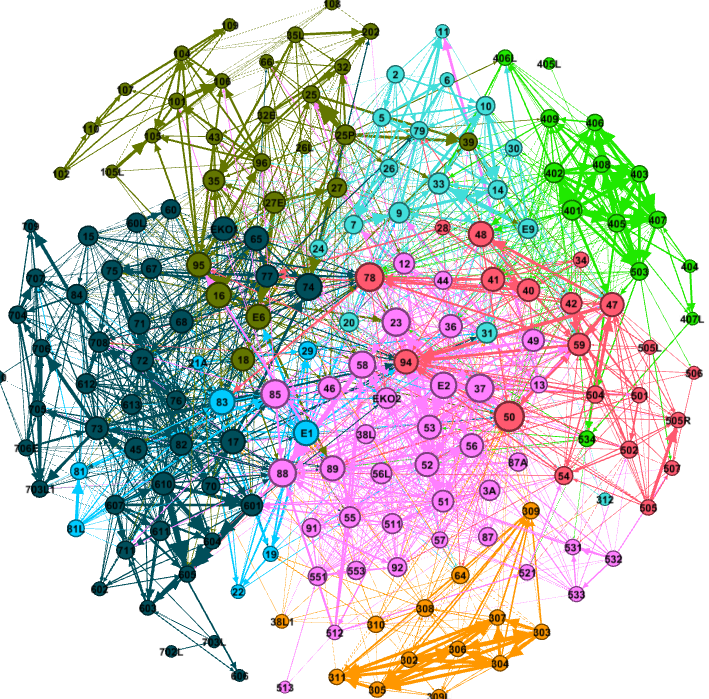

In [42]:
display(Image(filename='images/bgnetc_res_1.png'))

2) **Parameters:**<br>
Resolution: 3 <br>

    **Results:**
    Modularity: 0.435<br>
    Number of Communities: 3



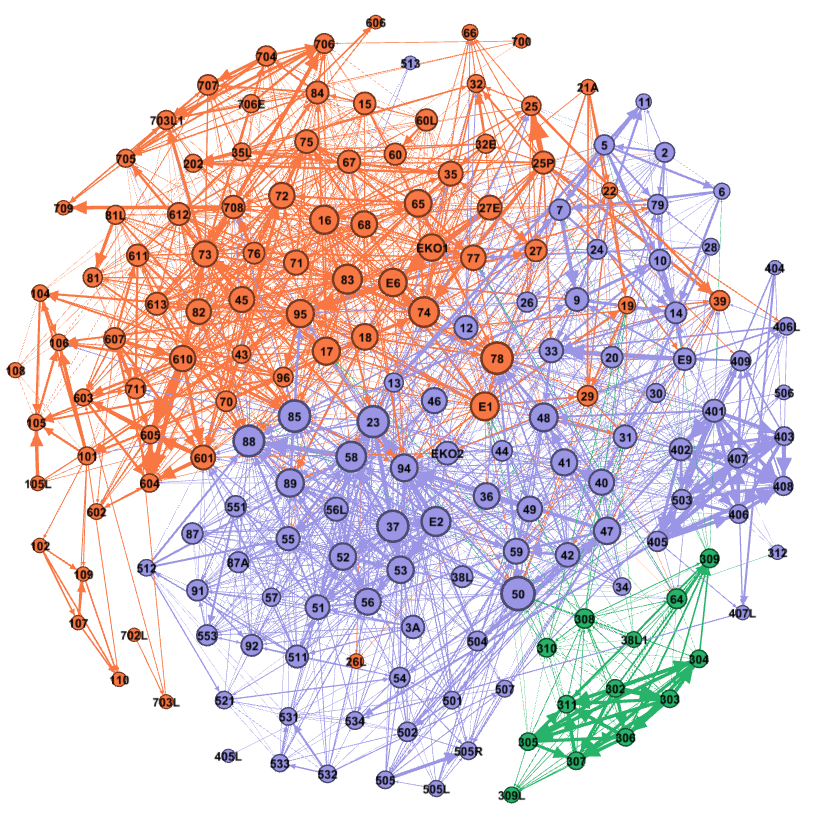

In [43]:
display(Image(filename='images/bgnetc_res_3.png'))

2) **Parameters:**<br>
Resolution: 0.5<br>

    **Results:**
    Modularity: 0.486<br>
    Number of Communities: 13


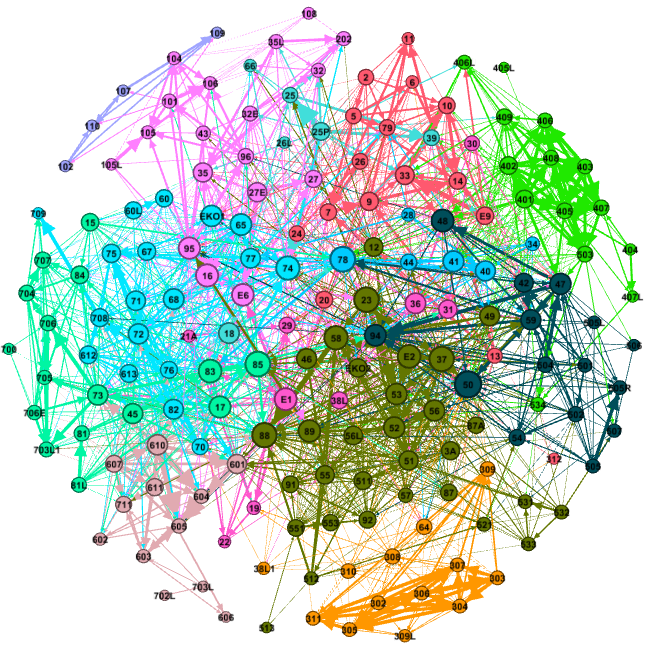

In [44]:
display(Image(filename='images/bgnetc_res_05.png'))


comment: Higher value of resolution parameter will produce smaller numbere of clusters (communities), and those clusters will naturally be greater in size.

18. 